<a href="https://colab.research.google.com/github/itsliya/team16/blob/main/bureau_filtered.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Home Credit Default Risk](https://www.kaggle.com/competitions/home-credit-default-risk/data?select=HomeCredit_columns_description.csv)

# Installing Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
bureau = pd.read_csv('/content/drive/MyDrive/Data X Personal Folder/Neural_Networks/bureau.csv')

# Cleaning bureau.csv

In [4]:
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


## Drop Irrelevant Features 

* CREDIT_CURRENCY 
  * The ideal would be to focus on just one of these countries, but since we do not have that information lets just drop it. Also, in Mexico we will only have one currency

In [5]:
bureau.drop('CREDIT_CURRENCY', axis = 1, inplace = True)

Explore Categorical Variables

In [6]:
L = [col for col in bureau.columns if bureau[col].dtype == object]

for col in L:
    print(col, 'has ',bureau[col].nunique(), ' distinct values.')

CREDIT_ACTIVE has  4  distinct values.
CREDIT_TYPE has  15  distinct values.


In [7]:
bureau['CREDIT_TYPE'].unique()

array(['Consumer credit', 'Credit card', 'Mortgage', 'Car loan',
       'Microloan', 'Loan for working capital replenishment',
       'Loan for business development', 'Real estate loan',
       'Unknown type of loan', 'Another type of loan',
       'Cash loan (non-earmarked)', 'Loan for the purchase of equipment',
       'Mobile operator loan', 'Interbank credit',
       'Loan for purchase of shares (margin lending)'], dtype=object)

Keep only the ones relevant for our model:
(SHOULD WE ONLY KEEP MICROLOAN?)
* 'Consumer credit' ✅
* 'Credit card' ✅
* 'Cash loan (non-earmarked)'. ✅
* 'Loan for the purchase of equipment' ✅
* 'Mobile operator loan' ✅
* 'Microloan' ✅
* 'Loan for working capital replenishment' ✅
* 'Loan for business development' ✅

Drop:
* 'Mortgage' ❌
* 'Car loan' ❌
* 'Real estate loan' ❌
* 'Unknown type of loan' ❌
* 'Another type of loan' ❌
* 'Interbank credit' ❌
* 'Loan for purchase of shares (margin lending) ❌

In [8]:
bureau.drop(bureau[bureau["CREDIT_TYPE"]=="Mortgage"].index, inplace=True)
bureau.drop(bureau[bureau["CREDIT_TYPE"]=="Car loan"].index, inplace=True)
bureau.drop(bureau[bureau["CREDIT_TYPE"]=="Real estate loan"].index, inplace=True)
bureau.drop(bureau[bureau["CREDIT_TYPE"]=="Unknown type of loan"].index, inplace=True)
bureau.drop(bureau[bureau["CREDIT_TYPE"]=="Another type of loan"].index, inplace=True)
bureau.drop(bureau[bureau["CREDIT_TYPE"]=="Interbank credit"].index, inplace=True)
bureau.drop(bureau[bureau["CREDIT_TYPE"]=="Loan for purchase of shares (margin lending)"].index, inplace=True)

bureau["CREDIT_TYPE"].unique()

array(['Consumer credit', 'Credit card', 'Microloan',
       'Loan for working capital replenishment',
       'Loan for business development', 'Cash loan (non-earmarked)',
       'Loan for the purchase of equipment', 'Mobile operator loan'],
      dtype=object)

In [9]:
bureau["CREDIT_TYPE"].value_counts()

Consumer credit                           1251615
Credit card                                402195
Microloan                                   12413
Loan for business development                1975
Loan for working capital replenishment        469
Cash loan (non-earmarked)                      56
Loan for the purchase of equipment             19
Mobile operator loan                            1
Name: CREDIT_TYPE, dtype: int64

## Correlations Between Independent Variables

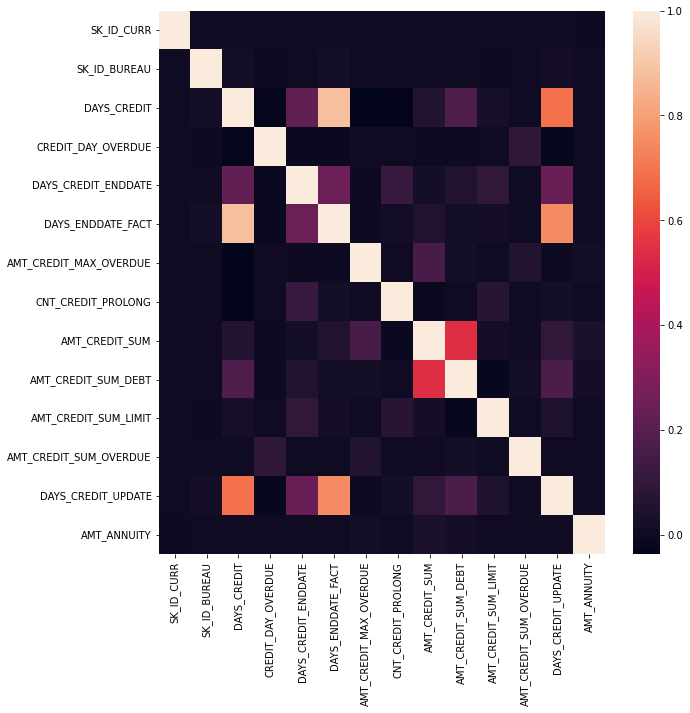

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(bureau.corr())

Drop DAYS_CREDIT and DAYS_ENDDATE_FACT

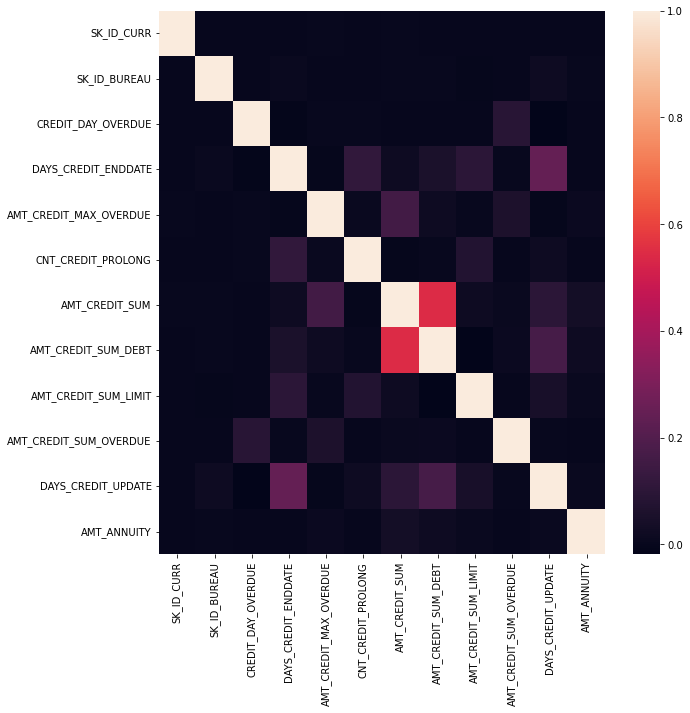

In [11]:
bureau.drop(["DAYS_CREDIT","DAYS_ENDDATE_FACT"], axis = 1, inplace = True)
plt.figure(figsize=(10,10))
sns.heatmap(bureau.corr())

Drop AMT_CREDIT_SUM

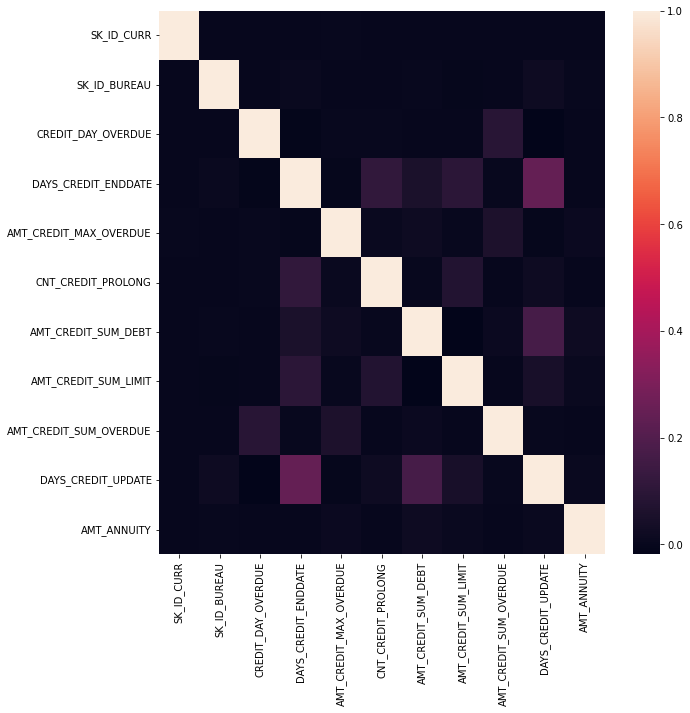

In [12]:
bureau.drop(["AMT_CREDIT_SUM"], axis = 1, inplace = True)
plt.figure(figsize=(10,10))
sns.heatmap(bureau.corr())

In [13]:
bureau.shape

(1668743, 13)

In [ ]:
#bureau.to_csv("bureau_filtered.csv.gz",compression='gzip')